In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import autotrail


from matplotlib import rc, cm
viridis = cm.get_cmap('viridis')
magma   = cm.get_cmap('magma')
plasma  = cm.get_cmap('plasma')



In [2]:
def make_test_graph(G=None,graphnum=0):
    arcs = autotrail.define_graph(graphnum=graphnum)._node_paths
    nodes = np.unique(arcs[:,0])

    edges = [(n[0],n[1], {'distance':n[3], 'weight':n[3]}) for n in arcs]

    if G is None:
        G = nx.Graph()
        
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

In [3]:
G = make_test_graph()

NameError: name 'Graph' is not defined

In [4]:
nx.shortest_path(G, 0, 4, weight = 'weight')

[0, 1, 2, 5, 4]

In [5]:
f = nx.classes.filters.hide_edges([(2,5)])
subG = nx.subgraph_view(G, filter_edge = f)

In [6]:
nx.shortest_path(subG, 0, 4, weight = 'weight')

[0, 1, 2, 4]

In [7]:
possible_points = nx.single_source_dijkstra(G, 0, weight='weight', cutoff=4)

In [8]:
x= nx.single_source_dijkstra(G, 0, weight='weight', cutoff=0)

In [9]:
import random
random.seed(12345)
def test(G, current_node, epsilon=0.25, target_distance=5):
    all_possible_points = nx.single_source_dijkstra(G, current_node,
                                                           weight='distance',
                                                           cutoff=(epsilon+0.1)*target_distance)

    if len(all_possible_points) == 0:
            if epsilon > 0.9:
                print("WARNING: Failed to find a route. Epsilon maxing out")
                return possible_routes # change to route so far !!

            print("Increasing epsilon in loop %f"%(epsilon))
            epsilon = epsilon + 0.1

    print(all_possible_points)
    
    farthest_node = np.max(all_possible_points[0].values())
    possible_points = [k for (k,v) in all_possible_points[0].items() if v >= (epsilon-0.1)*target_distance]
    print(possible_points)
    # select one at random!!!
    value = random.choice(possible_points)
    
    return value

In [10]:
nx.single_source_dijkstra(G, 0, 4, weight='weight')

(5, [0, 1, 2, 5, 4])

In [11]:
x = [1,2]
x.append([3,4])

In [12]:
x

[1, 2, [3, 4]]

In [13]:
G.get_edge_data(1,2)

{'distance': 1, 'weight': 1}

In [14]:
for n in G:
    print(G[n])

{1: {'distance': 1, 'weight': 1}}
{0: {'distance': 1, 'weight': 1}, 2: {'distance': 1, 'weight': 1}, 6: {'distance': 2, 'weight': 2}}
{1: {'distance': 1, 'weight': 1}, 3: {'distance': 3, 'weight': 3}, 4: {'distance': 4, 'weight': 4}, 5: {'distance': 2, 'weight': 2}}
{2: {'distance': 3, 'weight': 3}}
{2: {'distance': 4, 'weight': 4}, 5: {'distance': 1, 'weight': 1}}
{2: {'distance': 2, 'weight': 2}, 4: {'distance': 1, 'weight': 1}, 6: {'distance': 5, 'weight': 5}}
{1: {'distance': 2, 'weight': 2}, 5: {'distance': 5, 'weight': 5}}


In [15]:
for n in G.edges:
    print(n)

(0, 1)
(1, 2)
(1, 6)
(2, 3)
(2, 4)
(2, 5)
(4, 5)
(5, 6)


In [78]:
def plot(graph, node_order=None, boring=False):
    pos = nx.spring_layout(graph, weight='distance', seed = 12345)
    ax = nx.draw_networkx_nodes(graph, pos, node_size=700)

    ax.figure.set_size_inches(8,6)

    etraveled = [(u,v) for (u,v,d) in graph.edges(data=True) if d['traversed_count'] > 0]
    enottraveled = [(u,v) for (u,v,d) in graph.edges(data=True) if d['traversed_count'] == 0]

    colors = 'black'
    
    if (not (node_order is None)) and (not boring):
        ecolor_int = [node_order.index(e[0]) for e in etraveled]
        colors = magma((np.array(ecolor_int)+5) / ((1.0*len(node_order)+5)))
        
    if boring:
        style1 = style2 = 'solid'
        width1 = width2 = 3
    else:
        width1 = 6
        width2 = 2
        style1 = 'solid'
        style2 = 'dashed'
        
    temp = nx.draw_networkx_edges(graph, pos, edgelist=etraveled, width=width1, edge_color=colors,style=style1)
    temp = nx.draw_networkx_edges(graph, pos, edgelist=enottraveled, width=width2, style=style2)
    
    edge_labels = { (u,v) : "%i"%(d['distance']) for (u,v,d) in graph.edges(data=True)}
    temp = nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, label_pos=0.5)
    
    temp = nx.draw_networkx_labels(graph, pos, labels={n:n for n in graph.nodes()}, font_size=17,
                            font_color = 'white')


    return ax

In [34]:
x = [1,2,2,5]
print(x.index(1))
print(x.index(2))

0
1


In [17]:
Trail = make_test_graph(autotrail.TrailMap())
Trail.ensure_edge_attributes()

In [18]:
if False:
    Trail.recompute_edge_weights('weight')
    print(Trail.reduce_edge_data('weight'))

    for tail in Trail._adj:
        for head in Trail._adj[tail]:
            Trail._adj[tail][head]['weight'] = 0

    print(Trail.reduce_edge_data('weight'))
    Trail.recompute_edge_weights('weight')


TrailMap:  Possible and next:  [0] [0, 1]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 1, 'weight': 1, 'traversed_count': 1}]
[[0, 1]]
[0]
[[0.973381 0.46152  0.361965 1.      ]]


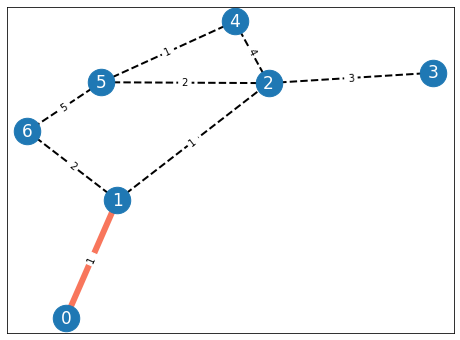

In [55]:
totals, possible_route = Trail.find_route(0,{'distance':1},end_node=1)
print(totals)
print(possible_route)
plot(Trail,node_order=possible_route[0])

TrailMap:  Possible and next:  [0] [0, 1]
TrailMap:  Finding shortest route to get home:  [1, 2, 3] 3
TrailMap:  Possible and next:  [0, 1] [1, 2, 3]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 5, 'weight': 5, 'traversed_count': 3}]
[[0, 1, 2, 3]]
[0, 1, 2]
[[0.804752 0.249911 0.442102 1.      ]
 [0.944006 0.377643 0.365136 1.      ]
 [0.992196 0.587502 0.406299 1.      ]]


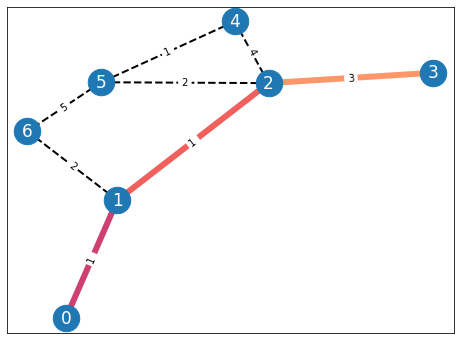

In [56]:
totals, possible_route = Trail.find_route(0,{'distance':2},end_node=3)
print(totals)
print(possible_route)
plot(Trail,node_order=possible_route[0])

TrailMap:  Possible and next:  [0] [0, 1, 2]
TrailMap:  Finding shortest route to get home:  [2, 5, 6] 6
TrailMap:  Possible and next:  [0, 1, 2] [2, 5, 6]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 9, 'weight': 9, 'traversed_count': 4}]
[[0, 1, 2, 5, 6]]
[0, 1, 2, 3]
[[0.716387 0.214982 0.47529  1.      ]
 [0.868793 0.287728 0.409303 1.      ]
 [0.967671 0.439703 0.35981  1.      ]
 [0.994738 0.62435  0.427397 1.      ]]


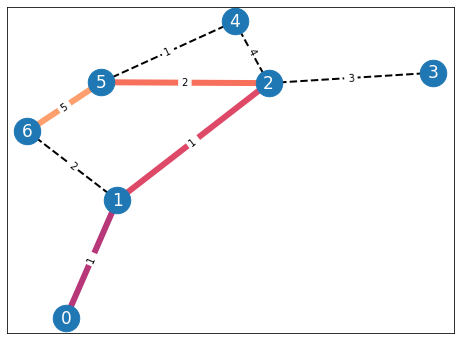

In [57]:
totals, possible_route = Trail.find_route(0,{'distance':8},end_node=6)
print(totals)
print(possible_route)
plot(Trail,node_order=possible_route[0])

TrailMap:  Possible and next:  [0] [0, 1, 2]
TrailMap:  Finding shortest route to get home:  [2, 5, 6, 1, 0] 0
TrailMap:  Possible and next:  [0, 1, 2] [2, 5, 6, 1, 0]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 12, 'weight': 32, 'traversed_count': 7}]
[[0, 1, 2, 5, 6, 1, 0]]
[0, 1, 1, 2, 3]
[[0.57549  0.16953  0.503466 1.      ]
 [0.716387 0.214982 0.47529  1.      ]
 [0.716387 0.214982 0.47529  1.      ]
 [0.846416 0.272473 0.421631 1.      ]
 [0.944006 0.377643 0.365136 1.      ]]


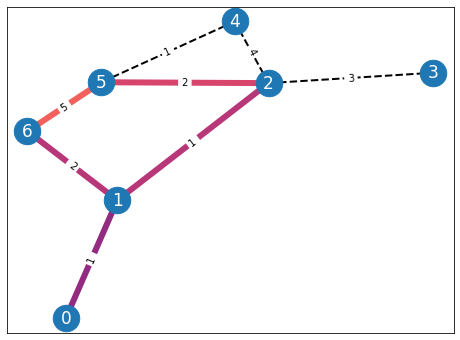

In [58]:
totals, possible_route = Trail.find_route(0,{'distance':8},end_node=0)
print(totals)
print(possible_route)
plot(Trail,node_order=possible_route[0])

TrailMap:  Possible and next:  [0] [0, 1, 6]
TrailMap:  Picking route on way to home 3 1 [6, 5, 2, 1]
TrailMap:  Possible and next:  [0, 1, 6] [6, 5, 2, 1]
TrailMap:  Picking route on way to home 1 0 [1, 0]
TrailMap:  Possible and next:  [0, 1, 6, 5, 2, 1] [1, 0]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 12, 'weight': 32, 'traversed_count': 7}]
[[0, 1, 6, 5, 2, 1, 0]]
[0, 1, 1, 4, 3]
[[0.57549  0.16953  0.503466 1.      ]
 [0.716387 0.214982 0.47529  1.      ]
 [0.716387 0.214982 0.47529  1.      ]
 [0.9867   0.535582 0.38221  1.      ]
 [0.944006 0.377643 0.365136 1.      ]]


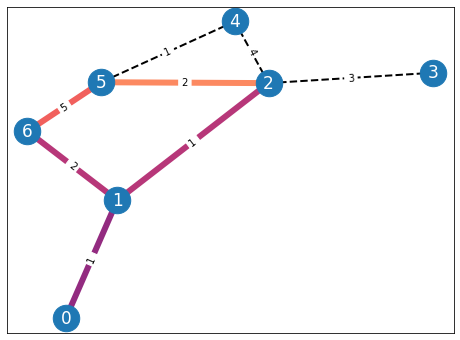

In [59]:
totals, possible_route = Trail.find_route(0,{'distance':20},end_node=0)
print(totals)
print(possible_route)
plot(Trail,node_order=possible_route[0])

In [24]:
TrailComplex = make_test_graph(autotrail.TrailMap(), graphnum=1)
TrailComplex.ensure_edge_attributes()

TrailMap:  Possible and next:  [0] [0, 1, 2, 5]
TrailMap:  Picking route on way to home 1 6 [5, 6]
TrailMap:  Possible and next:  [0, 1, 2, 5] [5, 6]
TrailMap:  Picking route on way to home 1 7 [6, 7]
TrailMap:  Possible and next:  [0, 1, 2, 5, 6] [6, 7]
TrailMap:  Picking route on way to home 2 11 [7, 10, 11]
TrailMap:  Possible and next:  [0, 1, 2, 5, 6, 7] [7, 10, 11]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 14, 'weight': 14, 'traversed_count': 7}]
[[0, 1, 2, 5, 6, 7, 10, 11]]
[0, 1, 2, 3, 4, 5, 6]
[[0.52527  0.152569 0.507192 1.      ]
 [0.652056 0.193986 0.491611 1.      ]
 [0.773695 0.236249 0.455289 1.      ]
 [0.889731 0.305079 0.397002 1.      ]
 [0.96331  0.42539  0.359469 1.      ]
 [0.990138 0.565296 0.395122 1.      ]
 [0.997325 0.711848 0.488154 1.      ]]


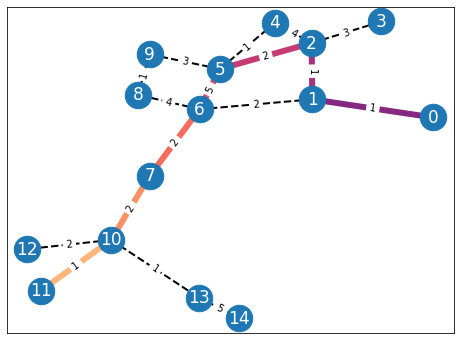

In [61]:
totals, possible_route = TrailComplex.find_route(0,{'distance':20},end_node=11)
print(totals)
print(possible_route)
plot(TrailComplex,node_order=possible_route[0])


TrailMap:  Possible and next:  [0] [0, 1, 6, 7, 10]
TrailMap:  Picking route on way to home 2 6 [10, 7, 6]
TrailMap:  Possible and next:  [0, 1, 6, 7, 10] [10, 7, 6]
TrailMap:  Picking route on way to home 1 5 [6, 5]
TrailMap:  Possible and next:  [0, 1, 6, 7, 10, 7, 6] [6, 5]
TrailMap:  Picking route on way to home 2 3 [5, 2, 3]
TrailMap:  Possible and next:  [0, 1, 6, 7, 10, 7, 6, 5] [5, 2, 3]
TrailMap:  We found a successful route! Well... got back home at least ...
[{'distance': 21, 'weight': 61, 'traversed_count': 11}]
[[0, 1, 6, 7, 10, 7, 6, 5, 2, 3]]


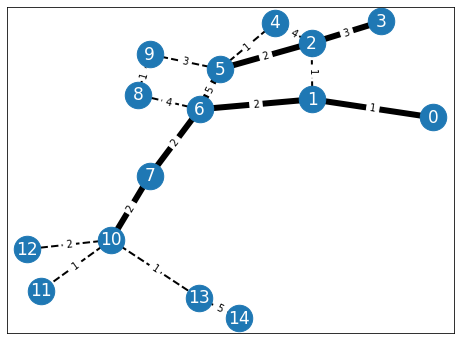

In [30]:
totals, possible_route = TrailComplex.find_route(0,{'distance':30},end_node=3)
print(totals)
print(possible_route)
plot(TrailComplex)

In [89]:
TrailComplex.find_route?

In [88]:
totals, possible_route = TrailComplex.find_route(0,{'distance':25},end_node=0)
print("\n\n\n")
print("Edge attribute totals: ", totals)
print("Route node path: ", possible_route)
x=plot(TrailComplex, node_order = possible_route[0])
x.figure.set_size_inches(8,8)
x.figure.savefig("test_fun.png")

TypeError: find_route() got multiple values for argument 'end_node'

Above example shows a route found for the same start / end point (node 0) with desired travelling distance of 25. Output route travels from node 0 to 13, then back, passing through new territory through nodes 5,2, and 1 before returning back. Total distance was 22

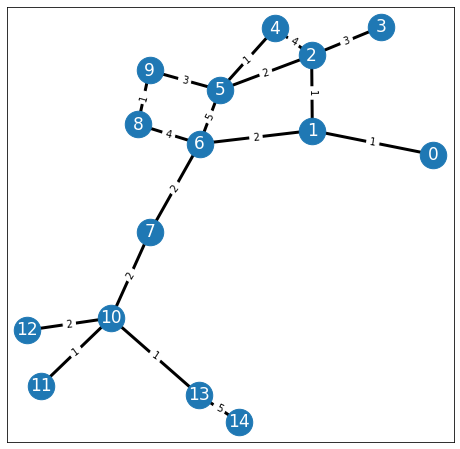

In [87]:
x = plot(TrailComplex, node_order = possible_route[0], boring = True)
x.figure.set_size_inches(8,8)
x.figure.savefig("test_boring.png")